# Black-Scholes: Plotting put and call surfaces

In this notebook, we show how to plot the put and call surfaces using the Black-Scholes analytical formulas. 

The value of a call option at time $t$ is given by

\begin{equation}
    C(S_t, t) = S_te^{-q\tau} N(d_1) - Ke^{-r\tau} N(d_2)
\end{equation}

where

\begin{align}
    d_1 &= \frac{\log \frac{S_t}{K} + (r - q + \frac{1}{2} \sigma^2)\tau}{\sigma \sqrt{\tau}}, \\
    d_2 &= d_1 - \sigma \sqrt{\tau},
\end{align}

$S_t$ is the stock price at time $t$, $T$ is the expiration time, $\tau$ is the time to maturity (i.e. $\tau = T - t$), $K$ is the strike price, $r$ is the risk-free interest rate, $q$ is the dividend rate, $\sigma$ is the stock volatility and $N(x)$ is the cumulative standard normal distribution function defined as

\begin{equation}
    N(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-\frac{1}{2} \phi^2} d\phi.
\end{equation}

The value of a put option at time $t$ is given by

\begin{equation}
    P(S_t, t) = Ke^{-r\tau} N(-d_2) - S_te^{-q\tau} N(-d_1).
\end{equation}

Using these formulas, plotting the price surfaces of put and call options is straightforward.

<IPython.core.display.Javascript object>


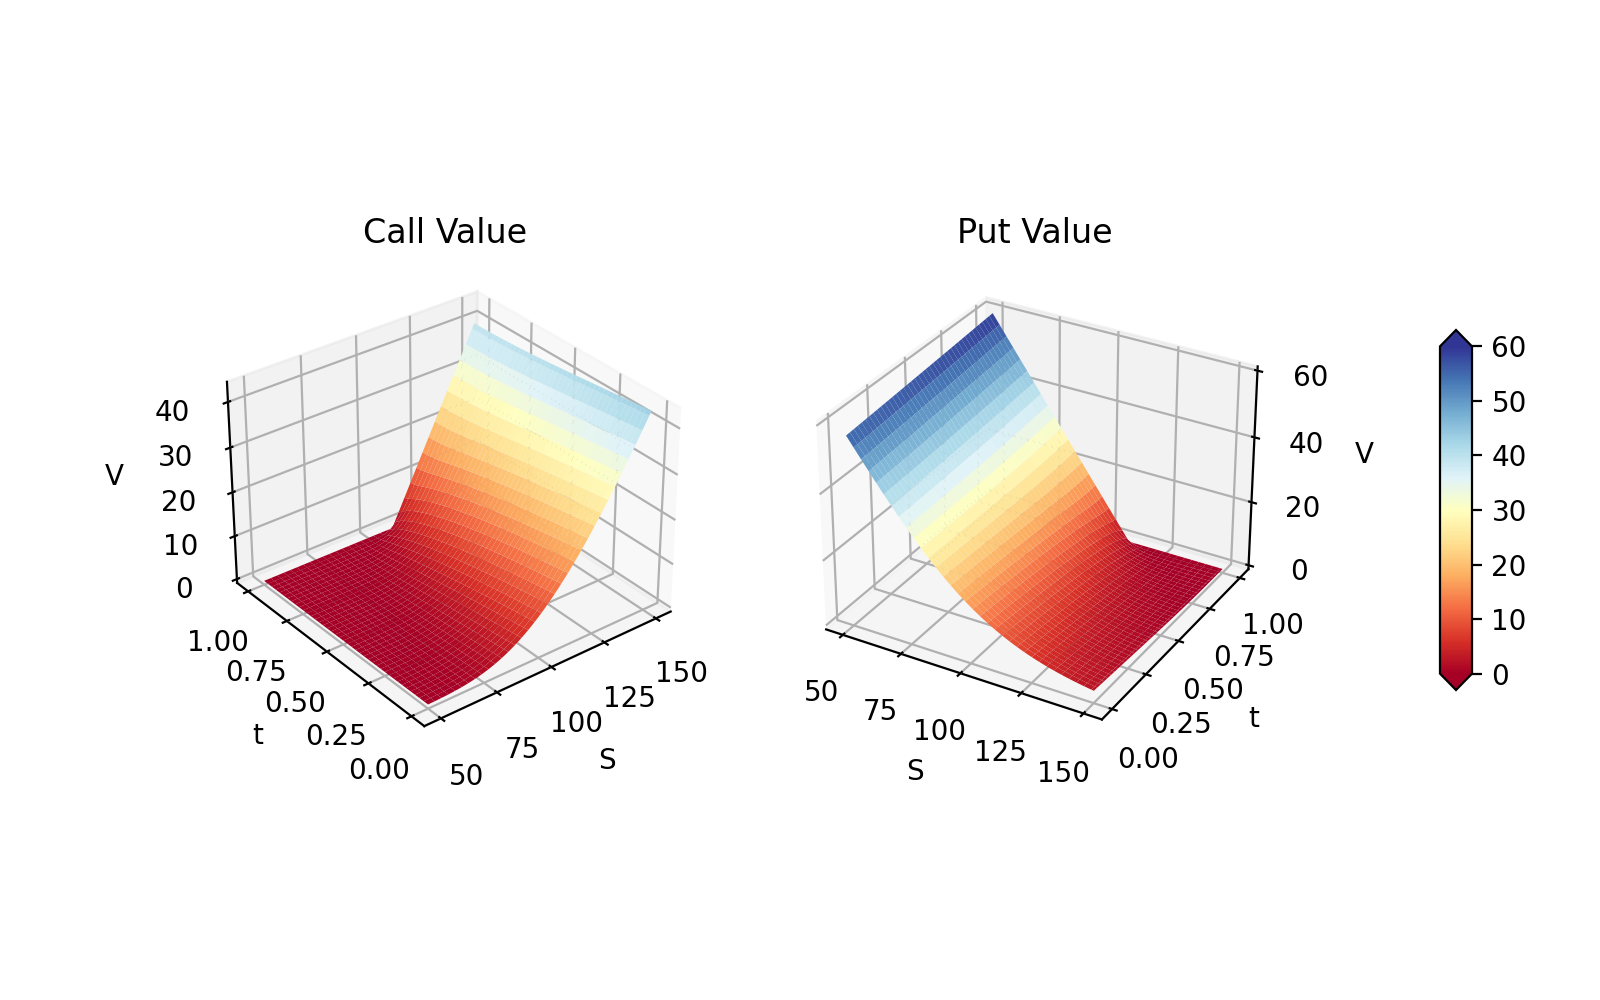

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# Interactive plots
%matplotlib notebook

# Parameters
T = 1         # Maturity
K = 110       # Strike
r = 0.05      # Interest Rate
q = 0.03      # Dividend Rate
sigma = 0.3   # Volatility

# Creates ranges for S and t values
S = np.arange(50, 151, 1)
t = np.arange(0, 1.025, 0.025)
S, t = np.meshgrid(S, t)

# Calculates d1 and d2 values
with np.errstate(divide='ignore', invalid='ignore'):
    d1 = (np.log(S/K) + (r-q + 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = (np.log(S/K) + (r-q - 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))

# Calculates call and put values
V_Call = S * np.exp(-q * (T-t)) * norm.cdf(d1) - K * np.exp(-r * (T-t)) * norm.cdf(d2)
V_Put = K * np.exp(-r * (T-t)) * norm.cdf(-d2) - S * np.exp(-q * (T-t)) * norm.cdf(-d1)

# Changes nan values to 0
V_Call = np.nan_to_num(V_Call,nan=0.0)
V_Put = np.nan_to_num(V_Put,nan=0.0)

# Creates the figure and the Call surface
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(S, t, V_Call, cmap = cm.RdYlBu, vmax=max(V_Call.max(), V_Put.max()))
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel('V')
ax.set_title('Call Value')

# Creates the Put surface
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(S, t, V_Put, cmap = cm.RdYlBu, vmax=max(V_Call.max(), V_Put.max()))
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel('V')
ax.set_title('Put Value')

# Adds the colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.31, 0.02, 0.36])
fig.colorbar(surf, cax=cbar_ax, extend='both');